<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Data Wrangling


Estimated time needed: **30** minutes
    

## Objectives

After completing this lab you will be able to:

* Handle missing values
* Correct data formatting
* Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#Identify-and-handle-missing-values">Identify and handle missing values</a>
        <ul>
            <li><a href="#Identify-missing-values">Identify missing values</a></li>
            <li><a href="#Deal-with-missing-data">Deal with missing values</a></li>
            <li><a href="#Correct-data-format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="#Data-Standardization">Data standardization</a></li>
    <li><a href="#Data-Normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="#Binning">Binning</a></li>
    <li><a href="#Indicator-Variable">Indicator variable</a></li>
</ul>
    
</div>
 
<hr>


<h2>What is the purpose of data wrangling?</h2>


You use data wrangling to convert data from an initial format to a format that may be better for analysis.


<h3>What is the fuel consumption (L/100k) rate for the diesel car?</h3>


<h3>Import data</h3>
<p>
You can find the "Automobile Dataset" from the following link: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>. 
You will be using this data set throughout this course.
</p>


<h4>Import pandas</h4> 


In [ ]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2


In [ ]:
import pandas as pd
import matplotlib.pylab as plt

In [1]:
import pandas as pd
import matplotlib as plt


<h2>Reading the dataset from the URL and adding the related headers</h2>


The functions below will download the dataset into your browser:


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

First, assign the URL of the data set to "filepath". 


In [ ]:
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

To obtain the dataset, utilize the download() function as defined above:


In [ ]:
await download(file_path, "usedcars.csv")
file_name="usedcars.csv"

Then, create a Python list <b>headers</b> containing name of headers.


In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [ ]:
df = pd.read_csv(file_name, names = headers)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
#df = pd.read_csv(filepath, header=headers)    # Utilize the same header list defined above

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(url)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers

 Use the method <b>head()</b> to display the first five rows of the dataframe. 


In [3]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


As you can see, several question marks appeared in the data frame; those missing values may hinder further analysis. 
<div>So, how do we identify all those missing values and deal with them?</div> 


<b>How to work with missing data?</b>

Steps for working with missing data:
<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>


# Identify and handle missing values


### Identify missing values
<h4>Convert "?" to NaN</h4>
In the car data set, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B.


In [ ]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

In [12]:
import numpy as np
df.replace('?',np.nan,inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. Use the following functions to identify these missing values. You can use two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [ ]:
missing_data = df.isnull()
missing_data.head(5)

In [7]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, you can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the data set.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [10]:
for columns in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200
True       4
Name: count, dtype: int64

price
price
False    200


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
symboling
False    204
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      40
Name: count, dtype: int64

make
make
False    204
Name: count, dtype: int64

fuel-type
fuel-type
False    204
Name: count, dtype: int64

aspiration
aspiration
False    204
Name: count, dtype: int64

num-of-doors
num-of-doors
False    202
True       2
Name: count, dtype: int64

body-style
body-style
False    204
Name: count, dtype: int64

drive-wheels
drive-wheels
False    204
Name: count, dtype: int64

engine-location
engine-location
False    204
Name: count, dtype: int64

wheel-base
wheel-base
False    204
Name: count, dtype: int64

length
length
False    204
Name: count, dtype: int64

width
width
False    204
Name: count, dtype: int64

height
height
False    204
Name: count, dtype: int64

curb-weight
curb-weight
False    204
Name: count, dtype: int64

engine-type
engine-type
False    204
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    204
Nam

Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


### Deal with missing data
<b>How should you deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


You should only drop whole columns if most entries in the column are empty. In the data set, none of the columns are empty enough to drop entirely.
You have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. Apply each method to different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.</li>
        </ul>
    </li>
</ul>


<h4>Calculate the mean value for the "normalized-losses" column </h4>


In [16]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [17]:
avg_norm_loss = df['normalized-losses'].astype(float).mean(axis = 0)
avg_norm_loss

np.float64(122.0)

<h4>Replace "NaN" with mean value in "normalized-losses" column</h4>


In [ ]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [19]:
df['normalized-losses'].replace (np.nan,avg_norm_loss,inplace = True)


<h4>Calculate the mean value for the "bore" column</h4>


In [ ]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

In [21]:
avg_bore = df['bore'].astype(float).mean(axis = 0)
avg_bore

np.float64(3.3290499999999996)

<h4>Replace "NaN" with the mean value in the "bore" column</h4>


In [ ]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [25]:
df['bore']= df['bore'].fillna(avg_bore)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "stroke" column with the mean value.</b>
</div>


In [27]:
# Write your code below and press Shift+Enter to execute 
avg_stroke = df['stroke'].astype(float).mean(axis = 0)
df['stroke']=df['stroke'].fillna(avg_stroke)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.32905,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,3.32905,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.32905,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.32905,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.32905,3.40,8.5,110,5500,19,25,15250


<details><summary>Click here for the solution</summary>

```python
#Calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace = True)
```

</details>



<h4>Calculate the mean value for the "horsepower" column</h4>


In [29]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.22277227722772


<h4>Replace "NaN" with the mean value in the "horsepower" column</h4>


In [30]:
df['horsepower']=df['horsepower'].fillna(avg_horsepower)

<h4>Calculate the mean value for "peak-rpm" column</h4>


In [31]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.990099009901


<h4>Replace "NaN" with the mean value in the "peak-rpm" column</h4>


In [33]:
df['peak-rpm']=df['peak-rpm'].fillna(avg_peakrpm)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.32905,2.68,9.00,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,3.32905,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.32905,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.32905,3.40,8.00,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.32905,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.32905,3.40,8.50,110,5500,19,25,17710
6,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.32905,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.32905,3.40,8.30,140,5500,17,20,23875
8,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.32905,3.40,7.00,160,5500,16,22,NaN
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.32905,2.80,8.80,101,5800,23,29,16430


In [42]:
miss2 = df.isna()
for column in miss2.columns.values.tolist():
    print(column)
    print(miss2[column].value_counts())

symboling
symboling
False    204
Name: count, dtype: int64
normalized-losses
normalized-losses
False    204
Name: count, dtype: int64
make
make
False    204
Name: count, dtype: int64
fuel-type
fuel-type
False    204
Name: count, dtype: int64
aspiration
aspiration
False    204
Name: count, dtype: int64
num-of-doors
num-of-doors
False    202
True       2
Name: count, dtype: int64
body-style
body-style
False    204
Name: count, dtype: int64
drive-wheels
drive-wheels
False    204
Name: count, dtype: int64
engine-location
engine-location
False    204
Name: count, dtype: int64
wheel-base
wheel-base
False    204
Name: count, dtype: int64
length
length
False    204
Name: count, dtype: int64
width
width
False    204
Name: count, dtype: int64
height
height
False    204
Name: count, dtype: int64
curb-weight
curb-weight
False    204
Name: count, dtype: int64
engine-type
engine-type
False    204
Name: count, dtype: int64
num-of-cylinders
num-of-cylinders
False    204
Name: count, dtype: int64
engin

To see which values are present in a particular column, we can use the ".value_counts()" method:


In [43]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      88
Name: count, dtype: int64

In [44]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      88
Name: count, dtype: int64

You can see that four doors is the most common type. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [45]:
df['num-of-doors'].value_counts().idxmax()

'four'

The replacement procedure is very similar to what you have seen previously:


In [46]:
df['num-of-doors']= df['num-of-doors'].fillna(df['num-of-doors'].value_counts().idxmax())

In [ ]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finally, drop all rows that do not have price data:


In [ ]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [50]:
df.dropna(subset = ['price'],axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [51]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.32905,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,3.32905,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.32905,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.32905,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.32905,3.40,8.5,110,5500,19,25,15250


In [55]:
miss3 = df.isna()
for column in df.columns.values.tolist():
    print(miss3[column].value_counts())
    print('')

symboling
False    200
Name: count, dtype: int64

normalized-losses
False    200
Name: count, dtype: int64

make
False    200
Name: count, dtype: int64

fuel-type
False    200
Name: count, dtype: int64

aspiration
False    200
Name: count, dtype: int64

num-of-doors
False    200
Name: count, dtype: int64

body-style
False    200
Name: count, dtype: int64

drive-wheels
False    200
Name: count, dtype: int64

engine-location
False    200
Name: count, dtype: int64

wheel-base
False    200
Name: count, dtype: int64

length
False    200
Name: count, dtype: int64

width
False    200
Name: count, dtype: int64

height
False    200
Name: count, dtype: int64

curb-weight
False    200
Name: count, dtype: int64

engine-type
False    200
Name: count, dtype: int64

num-of-cylinders
False    200
Name: count, dtype: int64

engine-size
False    200
Name: count, dtype: int64

fuel-system
False    200
Name: count, dtype: int64

bore
False    200
Name: count, dtype: int64

stroke
False    200
Name: count,

<b>Good!</b> Now, you have a data set with no missing values.


### Correct data format
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, you use:
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>


In [59]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<p>As you can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, the numerical values 'bore' and 'stroke' describe the engines, so you should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. You have to convert data types into a proper format for each column using the "astype()" method.</p> 


<h4>Convert data types to proper format</h4>


In [60]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [58]:
df['price'] = df['price'].astype(float)

<h4>Let us list the columns after the conversion</h4>


In [61]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>Wonderful!</b>

Now you finally obtained the cleansed data set with no missing values and with all data in its proper format.


## Data Standardization
<p>
You usually collect data from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where you subtract the mean and divide by the standard deviation.)
</p>
    
<b>What is standardization?</b>
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>
<p>Transform mpg to L/100km:</p>
<p>In your data set, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume you are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>You will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>


<p>Use this formula for unit conversion:<p>
L/100km = 235 / mpg
<p>You can do many mathematical operations directly using Pandas.</p>


In [62]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.32905,2.68,9.0,111,5000.0,21,27,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,3.32905,3.47,9.0,154,5000.0,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.32905,3.40,10.0,102,5500.0,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.32905,3.40,8.0,115,5500.0,18,22,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.32905,3.40,8.5,110,5500.0,19,25,15250.0


In [ ]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

In [64]:
df['city-L/100km'] = 235/df['city-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.32905,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,3.32905,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.32905,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.32905,3.40,8.0,115,5500.0,18,22,17450.0,13.055556
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.32905,3.40,8.5,110,5500.0,19,25,15250.0,12.368421


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform mpg to L/100km in the column of "highway-mpg" and change the name of column to "highway-L/100km".</b>
</div>


In [75]:
# Write your code below and press Shift+Enter to execute 
df['highway-mpg']=235/df['highway-mpg']
df.rename(columns={'highway-mpg':'highway-L/100km'},inplace=True)
df.head()

KeyError: 'highway-mpg'

<details><summary>Click here for the solution</summary>

```python
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

```
</details>




In [74]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.32905,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,3.32905,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,9.038462
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.32905,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,7.833333
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.32905,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,10.681818
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.32905,3.40,8.5,110,5500.0,19,9.400000,15250.0,12.368421,9.400000


## Data Normalization

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include 
<ol>
    <li>scaling the variable so the variable average is 0</li>
    <li>scaling the variable so the variance is 1</li> 
    <li>scaling the variable so the variable values range from 0 to 1</li>
</ol>
</p>

<b>Example</b>
<p>To demonstrate normalization, say you want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace the original value by (original value)/(maximum value)</p>


In [ ]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [77]:
df['length'] = df['length']/df['length'].max()
df['width']=df['width']/df['width'].max()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the column "height".</b>
</div>


In [79]:
# Write your code below and press Shift+Enter to execute 
df['height']=df['height']/df['height'].max()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.32905,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,3.32905,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,9.038462
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.32905,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,7.833333
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.32905,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,10.681818
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.32905,3.40,8.5,110,5500.0,19,9.400000,15250.0,12.368421,9.400000


<details><summary>Click here for the solution</summary>

```python
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()


```
</details>




Here you've normalized "length", "width" and "height" to fall in the range of [0,1].


## Binning
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>
<p>In your data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three ‘bins' to simplify analysis.</p>

<p>Use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


 Convert data to correct format:


In [ ]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

In [80]:
df['horsepower'] = df['horsepower'].astype(int, copy = True)

Plot the histogram of horsepower to see the distribution of horsepower.


Text(0.5, 1.0, 'horsepower bins')

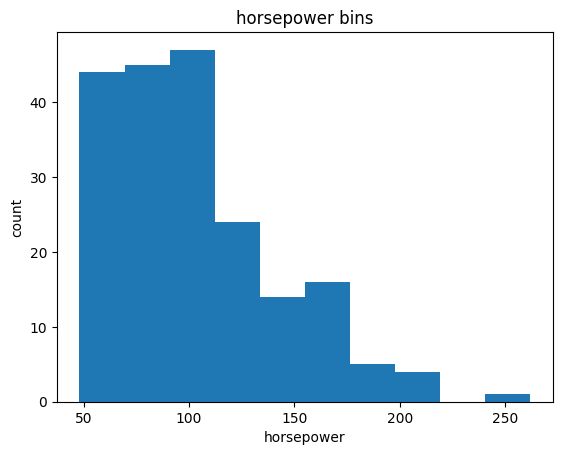

In [83]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['horsepower'])
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

Text(0.5, 1.0, 'horsepower bins')

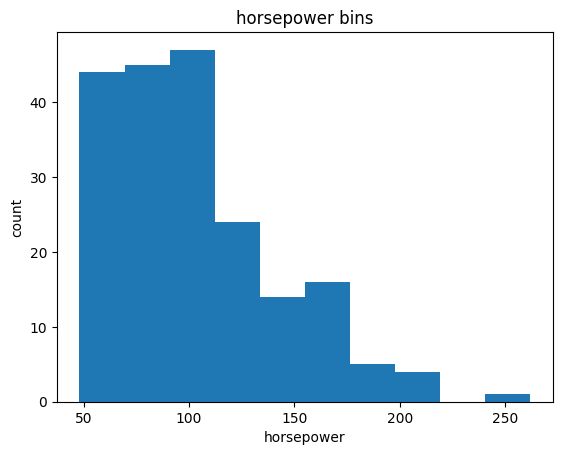

In [81]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>Find 3 bins of equal size bandwidth by using Numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since you want to include the minimum value of horsepower, set start_value = min(df["horsepower"]).</p>
<p>Since you want to include the maximum value of horsepower, set end_value = max(df["horsepower"]).</p>
<p>Since you are building 3 bins of equal length, you need 4 dividers, so numbers_generated = 4.</p>


Build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

In [84]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Set group  names:


In [ ]:
group_names = ['Low', 'Medium', 'High']

In [85]:
group_names = ['Low','Medium','High']

Apply the function "cut" to determine what each value of `df['horsepower']` belongs to. 


In [88]:
df['horsepower_binned'] = pd.cut(df['horsepower'],bins, labels=group_names, include_lowest = True)
df[['horsepower','horsepower_binned']].head(20)

,horsepower,horsepower_binned
0,111,Low
1,154,Medium
2,102,Low
3,115,Low
4,110,Low
5,110,Low
6,110,Low
7,140,Medium
8,101,Low
9,101,Low


In [86]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,154,Medium
2,102,Low
3,115,Low
4,110,Low
5,110,Low
6,110,Low
7,140,Medium
8,101,Low
9,101,Low


See the number of vehicles in each bin:


In [ ]:
df["horsepower-binned"].value_counts()

In [89]:
df['horsepower_binned'].value_counts()

horsepower_binned
Low       152
Medium     43
High        5
Name: count, dtype: int64

Plot the distribution of each bin:


Text(0.5, 1.0, 'horsepower_binned')

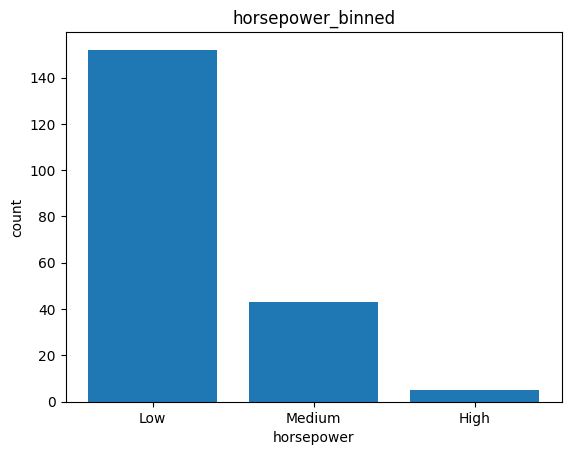

In [94]:
%matplotlib inline
plt.pyplot.bar(group_names, df['horsepower_binned'].value_counts())
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower_binned')

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>
    Look at the data frame above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High"). 
</p>
<p>
    You successfully narrowed down the intervals from 59 to 3!
</p>


<h3>Bins Visualization</h3>
Normally, you use a histogram to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'horsepower_bins')

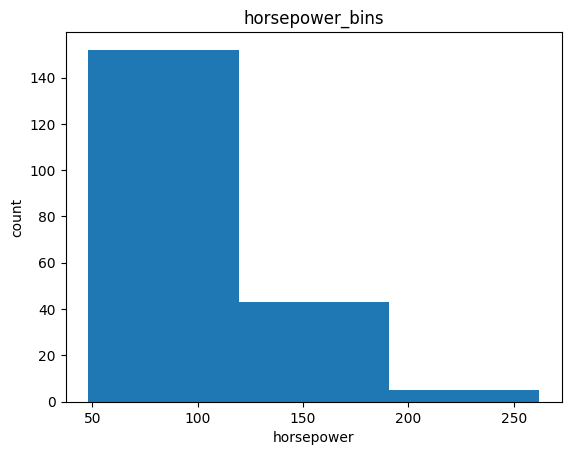

In [97]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df['horsepower'], bins  = 3)

plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower_bins')

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for the attribute "horsepower". 


## Indicator Variable
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why use indicator variables?</b>
<p>
    You use indicator variables so you can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert "fuel-type" to indicator variables.
</p>

<p>
    Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [98]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned', 'horsepower_binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable_1":


In [ ]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

In [100]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
5,False,True
6,False,True
7,False,True
8,False,True
9,False,True


Change the column names for clarity:


In [ ]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

In [102]:
dummy_variable_1.rename(columns = {'gas':'fuel_type_gas','diesel':'fuel_type_desel'},inplace= True)
dummy_variable_1

,fuel_type_desel,fuel_type_gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
5,False,True
6,False,True
7,False,True
8,False,True
9,False,True


In the data frame, column 'fuel-type' now has values for 'gas' and 'diesel' as 0s and 1s.


In [ ]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [106]:
df = pd.concat([df,dummy_variable_1],axis = 1)
df.drop('fuel-type',axis = 1, inplace = True)

In [107]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,highway-L/100km,horsepower-binned,horsepower_binned,fuel_type_desel,fuel_type_gas,fuel_type_desel,fuel_type_gas,fuel_type_desel,fuel_type_gas,fuel_type_desel,fuel_type_gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.32905,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,8.703704,Low,Low,False,True,False,True,False,True,False,True
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,3.32905,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,9.038462,Medium,Medium,False,True,False,True,False,True,False,True
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.32905,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,7.833333,Low,Low,False,True,False,True,False,True,False,True
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.32905,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,10.681818,Low,Low,False,True,False,True,False,True,False,True
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507,ohc,five,136,mpfi,3.32905,3.40,8.5,110,5500.0,19,9.400000,15250.0,12.368421,9.400000,Low,Low,False,True,False,True,False,True,False,True


The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "aspiration"</b>
</div>


In [120]:
# Write your code below and press Shift+Enter to execute 
dummy_v2 = pd.get_dummies(df['aspiration'])
dummy_v2.rename(columns = {'std':'aspiration_std','turbo':'aspiration_turbo'},inplace = True)
df = pd.concat([df,dummy_v2],axis =1)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel_type_desel,fuel_type_gas,aspiration_std,aspiration_turbo,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.32905,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False,True,False
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,3.32905,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False,True,False
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.84863,0.919444,0.908027,2337,ohc,four,109,mpfi,3.32905,3.4,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False,True,False
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.84863,0.922222,0.908027,2824,ohc,five,136,mpfi,3.32905,3.4,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False,True,False
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.88796,2507,ohc,five,136,mpfi,3.32905,3.4,8.5,110,5500.0,19,9.4,15250.0,12.368421,Low,False,True,True,False,True,False
5,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.32905,3.4,8.5,110,5500.0,19,9.4,17710.0,12.368421,Low,False,True,True,False,True,False
6,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.32905,3.4,8.5,110,5500.0,19,9.4,18920.0,12.368421,Low,False,True,True,False,True,False
7,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.32905,3.4,8.3,140,5500.0,17,11.75,23875.0,13.823529,Medium,False,True,False,True,False,True
8,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,0.9,0.908027,2395,ohc,four,108,mpfi,3.32905,2.8,8.8,101,5800.0,23,8.103448,16430.0,10.217391,Low,False,True,True,False,True,False
9,0,192,bmw,std,four,sedan,rwd,front,101.2,0.849592,0.9,0.908027,2395,ohc,four,108,mpfi,3.32905,2.8,8.8,101,5800.0,23,8.103448,16925.0,10.217391,Low,False,True,True,False,True,False


In [122]:
df = df.T.drop_duplicates().T
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel_type_desel,fuel_type_gas,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.32905,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,3.32905,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.84863,0.919444,0.908027,2337,ohc,four,109,mpfi,3.32905,3.4,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.84863,0.922222,0.908027,2824,ohc,five,136,mpfi,3.32905,3.4,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,0.88796,2507,ohc,five,136,mpfi,3.32905,3.4,8.5,110,5500.0,19,9.4,15250.0,12.368421,Low,False,True,True,False
5,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.32905,3.4,8.5,110,5500.0,19,9.4,17710.0,12.368421,Low,False,True,True,False
6,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.32905,3.4,8.5,110,5500.0,19,9.4,18920.0,12.368421,Low,False,True,True,False
7,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.32905,3.4,8.3,140,5500.0,17,11.75,23875.0,13.823529,Medium,False,True,False,True
8,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,0.9,0.908027,2395,ohc,four,108,mpfi,3.32905,2.8,8.8,101,5800.0,23,8.103448,16430.0,10.217391,Low,False,True,True,False
9,0,192,bmw,std,four,sedan,rwd,front,101.2,0.849592,0.9,0.908027,2395,ohc,four,108,mpfi,3.32905,2.8,8.8,101,5800.0,23,8.103448,16925.0,10.217391,Low,False,True,True,False


<details><summary>Click here for the solution</summary>

```python
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()


```
</details>




 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe, then drop the column 'aspiration'.</b>
</div>


In [127]:
# Write your code below and press Shift+Enter to execute 
df.drop('aspiration',axis = 1,inplace= True)
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel_type_desel,fuel_type_gas,aspiration_std,aspiration_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.32905,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,3.32905,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
2,2,164,audi,four,sedan,fwd,front,99.8,0.84863,0.919444,0.908027,2337,ohc,four,109,mpfi,3.32905,3.4,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
3,2,164,audi,four,sedan,4wd,front,99.4,0.84863,0.922222,0.908027,2824,ohc,five,136,mpfi,3.32905,3.4,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,0.88796,2507,ohc,five,136,mpfi,3.32905,3.4,8.5,110,5500.0,19,9.4,15250.0,12.368421,Low,False,True,True,False
5,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844,ohc,five,136,mpfi,3.32905,3.4,8.5,110,5500.0,19,9.4,17710.0,12.368421,Low,False,True,True,False
6,1,122,audi,four,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954,ohc,five,136,mpfi,3.32905,3.4,8.5,110,5500.0,19,9.4,18920.0,12.368421,Low,False,True,True,False
7,1,158,audi,four,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086,ohc,five,131,mpfi,3.32905,3.4,8.3,140,5500.0,17,11.75,23875.0,13.823529,Medium,False,True,False,True
8,2,192,bmw,two,sedan,rwd,front,101.2,0.849592,0.9,0.908027,2395,ohc,four,108,mpfi,3.32905,2.8,8.8,101,5800.0,23,8.103448,16430.0,10.217391,Low,False,True,True,False
9,0,192,bmw,four,sedan,rwd,front,101.2,0.849592,0.9,0.908027,2395,ohc,four,108,mpfi,3.32905,2.8,8.8,101,5800.0,23,8.103448,16925.0,10.217391,Low,False,True,True,False


<details><summary>Click here for the solution</summary>

```python
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)


```
</details>




Save the new csv:


In [ ]:
df.to_csv('clean_df.csv')

In [128]:
df.to_csv('clean_auto_df.csv')

### Thank you for completing this lab!


## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>


### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a>

<a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<a href=" https://www.coursera.org/instructor/~129186572/" target="_blank" >Abhishek Gagneja </a>

## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>
<!--
## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-09-28 | 2.3| Abhishek Gagneja| Instructional Update |
| 2020-10-30  | 2.2  | Lakshmi  |  Changed URL of csv  |
| 2020-09-09  | 2.1  | Lakshmi  |  Updated Indicator Variables section  |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab  |


--!>

<hr>


